In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

import itertools
import warnings
warnings.filterwarnings("ignore")

#### Задание 1

Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [2]:
#Path_Energy = 'PJME_hourly.csv'
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


Text(0, 0.5, 'Потребление энергии')

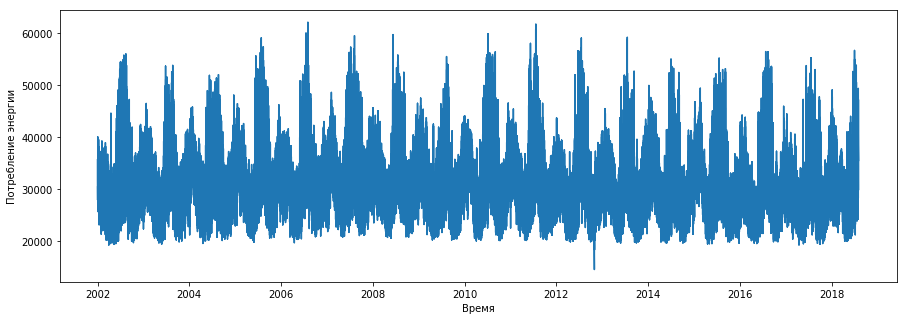

In [3]:
plt.figure(figsize=(15,5))
plt.plot(data.index, data['PJME_MW'])
plt.xlabel('Время')
plt.ylabel('Потребление энергии')

In [4]:
df_m = data.resample('M').mean()
df_m.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


Text(0, 0.5, 'Потребление энергии')

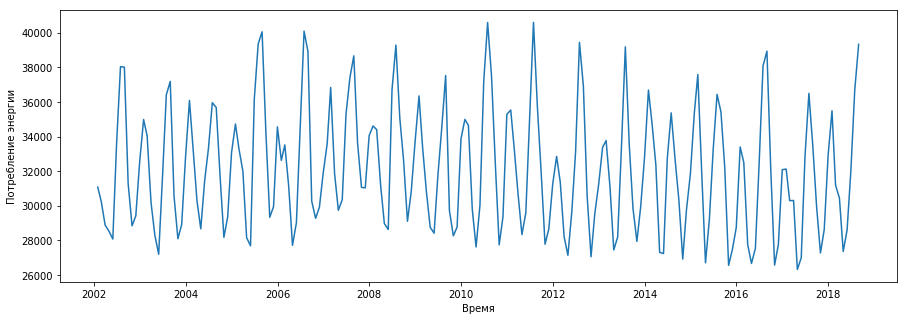

In [5]:
plt.figure(figsize=(15,5))
plt.plot(df_m.index, df_m['PJME_MW'])
plt.xlabel('Время')
plt.ylabel('Потребление энергии')

#### Задание 2
Подберите параметры модели SARIMAX для этого ряда.

Count lags - 9


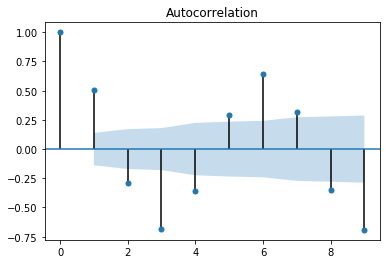

Count lags - 13


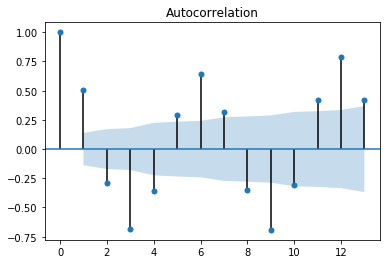

Count lags - 17


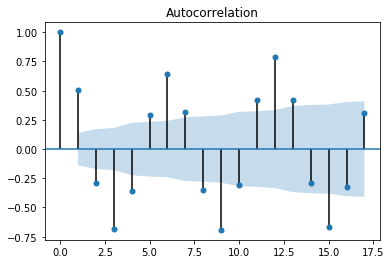

Count lags - 26


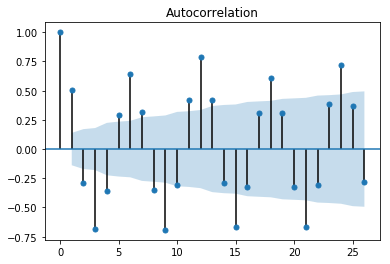

Count lags - 30


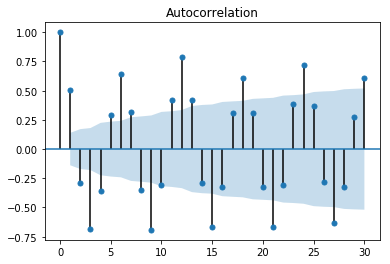

Count lags - 35


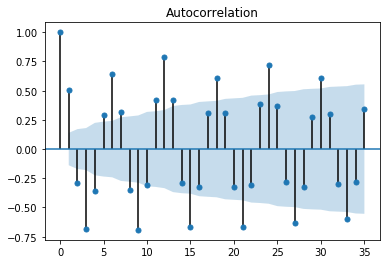

In [6]:
for lag in [9, 13, 17, 26, 30, 35]:
    print(f'Count lags - {lag}')
    sm.graphics.tsa.plot_acf(df_m['PJME_MW'].values, lags=lag)
    plt.show()

In [7]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, [26]))

In [8]:
data = []
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_m['PJME_MW'].values[:-30],order=param,
                                        seasonal_order=seasonal_param ,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
            aic = mod.fit().aic
            parametrs = list(param + seasonal_param)
            parametrs.append(aic)

            data.append(parametrs)
        except:
            continue

df_aic = pd.DataFrame(columns=['p', 'd', 'q', 'P', 'D', 'Q', 'm', 'AIC'], data=data)
df_aic.head()

,p,d,q,P,D,Q,m,AIC
0,0,0,0,0,0,0,26,3992.511008
1,0,0,0,0,0,1,26,3285.657059
2,0,0,0,0,0,2,26,4730.624730
3,0,0,0,0,1,0,26,2879.425251
4,0,0,0,0,1,1,26,2339.951891


In [9]:
best_params = df_aic.loc[df_aic['AIC'] == df_aic['AIC'].min()]
best_params

,p,d,q,P,D,Q,m,AIC
461,2,1,0,2,2,1,26,1206.816783


In [10]:
fin_mod_m = sm.tsa.statespace.SARIMAX(df_m['PJME_MW'].values[:-30], 
                                        order=[2, 1, 0],
                                        seasonal_order=[2, 2, 1, 26],
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
results_m = fin_mod_m.fit()
results_m.aic

1206.8167833934413

#### Задание 3
Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Недельная модель более точная по сравнению с дневной